In [ ]:
import os
os.chdir('/datasets')
os.getcwd()

'/content/drive/MyDrive/DL_datasets'

In [ ]:
#pandas
import pandas as pd 

#matplotlib
import matplotlib.pyplot as plt 

#seaborn
import seaborn as sns

#numpy
import numpy as np

#sklearn libraries
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
def load_dataset10_11(district_name):
    # file_path = os.path.join('./drive','MyDrive','DL_datasets', f'2010-11_Production_Crop_{district_name}.csv')
    file_path = f'./2010-11_Production_Crops_{district_name}.csv'
    
    print(file_path)
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        return ""#raise FileNotFoundError(f'Dataset for {district_name} not found.')

def load_dataset11_12(district_name):
    # file_path = os.path.join('./drive','MyDrive','DL_datasets', f'2010-11_Production_Crop_{district_name}.csv')
    file_path = f'./2011-12_Production_Crops_{district_name}.csv'
    
    print(file_path)
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        return ""#raise FileNotFoundError(f'Dataset for {district_name} not found.')

def load_dataset(file_name):
    # file_path = os.path.join('./drive','MyDrive','DL_datasets', f'2010-11_Production_Crop_{district_name}.csv')
    file_path = f'./{file_name}.csv'
    
    print(file_path)
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        raise FileNotFoundError(f'Dataset for {file_name} not found.')

In [ ]:
maharashtra_districts = [
    "Ahmadnagar",
    "Akola",
    "Amravati",
    "Aurangabad",
    "Beed",
    "Bhandara",
    "Buldana",
    "Chandrapur",
    "Dhule",
    "Gadchiroli",
    "Gondiya",
    "Hingoli",
    "Jalgaon",
    "Jalna",
    "Kolhapur",
    "Latur",
    "Nagpur",
    "Nanded",
    "Nandurbar",
    "Nashik",
    "Osmanabad",
    "Parbhani",
    "Pune",
    "Raigarh",
    "Ratnagiri",
    "Sangli",
    "Satara",
    "Sindhudurg",
    "Solapur"
]
maharashtra_districts11 = [
    "Ahmadnagar",
    "Akola",
    "Amravati",
    "Aurangabad",
    "Beed",
    "Bhandara",
    "Buldana",
    "Chandrapur",
    "Dhule",
    "Gadchiroli",
    "Gondiya",
    "Hingoli",
    "Jalgaon",
    "Jalna",
    "Kolhapur",
    "Latur",
    "Nagpur",
    "Nanded",
    "Nandurbar",
    "Nashik",
    "Osmanabad",
    "Parbhani",
    "Pune",
    "Raigarh",
    "Ratnagiri",
    "Sangli",
    "Satara",
    "Sindhudurg",
    "Solapur",
    "Thane",
    "Wardha",
    "Washim",
    "Yavatmal"
]

In [ ]:
all_data = []

for district in maharashtra_districts11:
    data = load_dataset11_12(district)
    all_data.append(data)
for district in maharashtra_districts:
    data = load_dataset10_11(district)
    all_data.append(data)
combined_data = pd.concat(all_data, ignore_index=True)

In [ ]:
#uncleaned data
# combined_data_cleaned.to_csv("./combined_data.csv")
combined_data_cleaned = combined_data#load_dataset_("combined_data")
#cleaning data
combined_data_cleaned = combined_data_cleaned.fillna(0)
#drop - DISTRICT_CODE , TALUKA_CODE, REFERENCE_YEAR
combined_data_cleaned = combined_data_cleaned.replace(to_replace='\.', value='0', regex=True)
#cleaned data
combined_data_cleaned

In [ ]:
# del combined_data_cleaned[combined_data_cleaned. columns[-1]]
# function to get the max of the crop from the taluka
def getting_the_max_of_row(df):
  # getting max
  # create a list of crop columns
  crop_cols = ['RICE', 'WHEAT', 'JOWAR', 'BAJRA', 'BARLEY', 'MAIZE', 'RAGI', 'OTHER_CEREALS',
              'GRAM', 'TUR', 'UDID', 'MUNG', 'MASOOR', 'OTHER_PULSES', 'LINSEED_JAWAS', 'GROUNDNUTS',
              'SUNFLOWER', 'SESAMUM', 'SOYABEAN', 'OTHER_OIL_SEEDS', 'SUGARCANE', 'COTTON', 'TAG',
              'MESTA', 'TOBACCO', 'MEDICINAL', 'OTHER_SPICES']

  # find the column with the maximum value for each row
  df['target_crop'] = df[crop_cols].idxmax(axis=1)

  # remove the numeric values from the column names
  df['target_crop'] = df['target_crop'].str.replace(r'\d+', '')

  # remove the underscores from the column names
  df['target_crop'] = df['target_crop'].str.replace('_', '')

  # strip any whitespace from the column names
  df['target_crop'] = df['target_crop'].str.strip()
  # return target_crop

# we will set the value of target_crop column to the max value found with above function
# we will create a row here and then set the value in it then append it
# combined_data_cleaned['target_crop'] = 

getting_the_max_of_row(combined_data_cleaned)

combined_data_cleaned

In [ ]:
combined_data_cleaned = combined_data_cleaned.drop(combined_data_cleaned.loc[:, "RICE":"OTHER_OIL_SEEDS/_Missing"].columns,axis = 1)
combined_data_cleaned

In [ ]:
combined_data_cleaned = combined_data_cleaned.drop(combined_data_cleaned.iloc[:, 0:3],axis = 1)
combined_data_cleaned = combined_data_cleaned.drop(combined_data_cleaned.loc[:, ["TALUKA_ID"]].columns,axis = 1)
combined_data_cleaned

In [ ]:
combined_data_cleaned.to_csv("CleanedDataDoubleMerge_processed.csv") #change name so you don't replace next dataset

The Code until above cell provides processed data, later we add soil_moisture data using the below formula: 

_((RAND() * ([max\_limit ]- [min\_limit ]+ 1))+ [min\_limit]) / 10_

continue below code separately.

In [ ]:
data = load_dataset("CleanedDataDoubleMerge_processed")
data.head()

./CleanedDataDoubleMerge_processed.csv


,TALUKA_NAME,target_crop,soil_moisture
0,Paithan,BAJRA,0.425562
1,Dhule,BAJRA,0.372776
2,Erandol,BAJRA,0.476110
3,Amalner,BAJRA,0.520020
4,Parola,BAJRA,0.473404


In [ ]:
data.isnull().sum()

TALUKA_NAME      0
target_crop      0
soil_moisture    0
dtype: int64

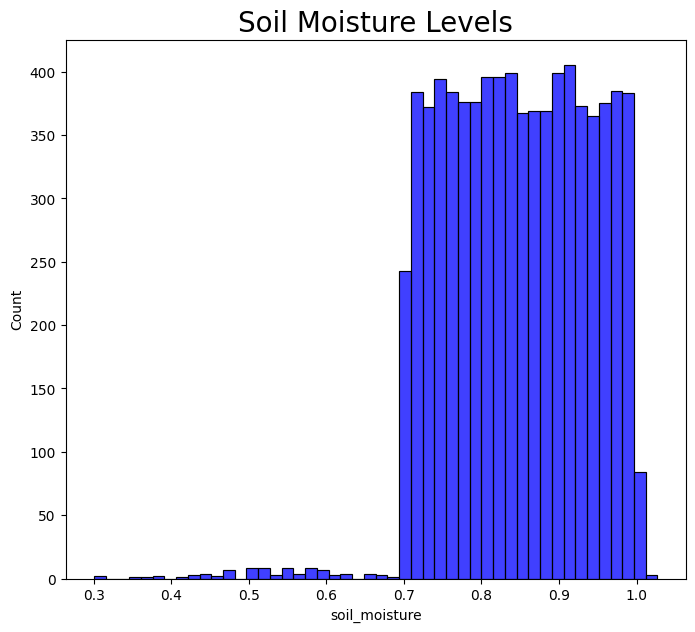

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x='soil_moisture',data=data,color='b');
plt.title("Soil Moisture Levels",{'fontsize':20});

In [ ]:
data['target_crop_label'] = pd.Categorical(data.target_crop).codes
data['taluka_code'] = pd.Categorical(data.TALUKA_NAME).codes

In [ ]:
data

,TALUKA_NAME,target_crop,soil_moisture,target_crop_label,taluka_code
0,Paithan,BAJRA,0.425562,0,237
1,Dhule,BAJRA,0.372776,0,93
2,Erandol,BAJRA,0.476110,0,101
3,Amalner,BAJRA,0.520020,0,13
4,Parola,BAJRA,0.473404,0,248
...,...,...,...,...,...
7676,Ardhapur,WHEAT,0.549717,13,21
7677,Taloda,WHEAT,0.780498,13,328
7678,Shahada,WHEAT,0.551050,13,295
7679,Nandurbar,WHEAT,0.696382,13,227


In [ ]:
X = data.drop(['TALUKA_NAME','target_crop','target_crop_label'], axis =1)
y = data.target_crop_label

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,shuffle=True)

In [ ]:
print( X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5376, 2) (2305, 2) (5376,) (2305,)


In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar. transform(X_test)

In [ ]:
print( X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5376, 2) (2305, 2) (5376,) (2305,)


In [ ]:
#modal building
models = {
    LogisticRegression(max_iter=1000):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  94.2299349240781 %
Accuracy Score for Random Forest is :  95.22776572668113 %
Accuracy Score for Support Vector Machine is :  94.2299349240781 %


In [ ]:
#Continuing with - Random Forest as it provides higher Accuracy
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.40      0.29         5
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.68      0.40      0.50        70
          10       0.37      0.38      0.37        29
          11       0.97      0.99      0.98      2162
          12       0.50      0.25      0.33         4
          13       0.64      0.70      0.67        10

    accuracy                           0.95      2305
   macro avg       0.37      0.27      0.29      2305
weighted avg       0.95      0.95      0.95      2305



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


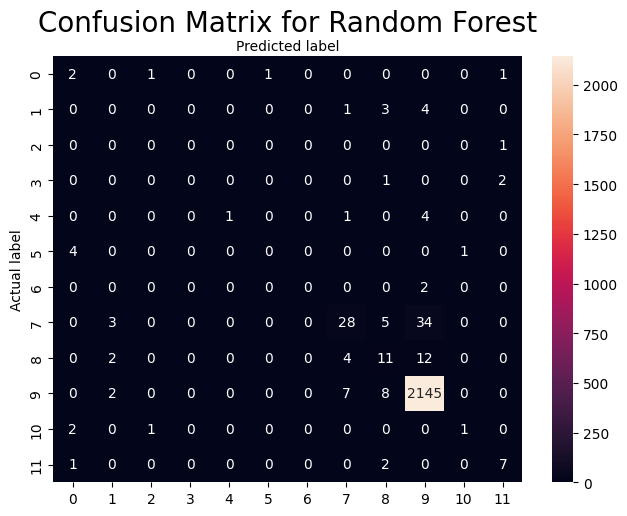

In [ ]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

array([[-0.27286565, -0.798882  ],
       [-0.54798145,  0.89863799],
       [ 1.59425119,  0.79187572],
       ...,
       [-1.40321935,  0.89863799],
       [-0.62966059,  1.11216251],
       [-0.80678181,  0.79187572]])